| Column Name | English Description | German Description |
|-------------|---------------------|--------------------|
| Age         | The age of the patient in years. | Das Alter des Patienten in Jahren. |
| Sex         | The sex of the patient (1 = male, 0 = female). | Das Geschlecht des Patienten (1 = männlich, 0 = weiblich). |
| Cp          | Type of chest pain (values range from 0 to 3). | Art der Brustschmerzen (Werte von 0 bis 3). |
| Trtbps      | Resting blood pressure in mm Hg. | Ruhender Blutdruck in mm Hg. |
| Chol        | Serum cholesterol in mg/dl. | Serumcholesterin in mg/dl. |
| Fbs         | Fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false). | Nüchternblutzucker (> 120 mg/dl, 1 = wahr; 0 = falsch). |
| Restecg     | Resting electrocardiographic results (0,1,2). | Ergebnisse des Ruhe-EKG (0,1,2). |
| Thalachh    | Maximum heart rate achieved. | Maximal erreichte Herzfrequenz. |
| Exng        | Exercise induced angina (1 = yes; 0 = no). | Durch Übung induzierte Angina (1 = ja; 0 = nein). |
| Oldpeak     | ST depression induced by exercise relative to rest. | Durch Bewegung induzierte ST-Senkung im Vergleich zur Ruhe. |
| Slp         | Slope of the peak exercise ST segment. | Steigung des ST-Segments bei maximaler Belastung. |
| Caa         | Number of major vessels colored by fluoroscopy (0-3). | Anzahl der durch Fluoroskopie gefärbten großen Gefäße (0-3). |
| Thall       | Thallium stress test result (values 0-3). | Ergebnis des Thallium-Stress-Tests (Werte 0-3). |
| Output      | Diagnosis of heart disease (1 = disease; 0 = no disease). | Diagnose der Herzkrankheit (1 = Krankheit; 0 = keine Krankheit). |


# PART 1 

## 1. Import the necessary libraries (Importieren Sie die notwendigen Bibliotheken )

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## 2. Import the dataset (chipotle.tsv) and  analyze   (Importieren Sie den Datensatz und analysieren )

In [2]:
### 1.Print first 5 row of the dataset (Geben Sie die ersten 5 Zeilen des Datensatzes aus.)
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
### 2 Use the 'check_df' function to analyze the dataset.(Verwende die Funktion 'check_df', um das Dataset zu analysieren)

def check_df(dataframe, head=3):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Duplicate Values #####################")
    print(dataframe.duplicated().sum())

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### NA #####################")
    print(dataframe.isna().mean()*100)

    print("##################### Unique Values #####################")
    print(dataframe.nunique())

check_df(df)

##################### Shape #####################
(289, 14)
##################### Duplicate Values #####################
1
##################### Types #####################
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object
##################### Head #####################
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   60    1   3     145   233    1        0       150     0      2.3    0   
1   35    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
##################### NA #####################
age         0.0
sex         0.0


In [4]:
### 3. Drop duplicated and missing values ( Entferne doppelte und fehlende Werte)

df.drop_duplicates()
df.dropna(inplace=True)

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
### 4. Use the 'find_categorical_columns' function to find the categorical columns.
### Verwende die Funktion 'find_categorical_columns', um die kategorischen Spalten zu finden

def find_categorical_columns(df, max_unique_values=3, include_mixed_types=True):
    categorical_cols = []
    for col in df.columns:
        dtype = str(df[col].dtypes)       
        if dtype in ["category", "object", "bool"]:
            categorical_cols.append(col)
        elif include_mixed_types and pd.api.types.is_object_dtype(df[col]):
            categorical_cols.append(col)
        else:
            num_unique_values = df[col].nunique(dropna=False)
            if num_unique_values <= max_unique_values:
                categorical_cols.append(col)
    return categorical_cols
categorical_columns = find_categorical_columns(df)

In [7]:
categorical_columns

['sex', 'fbs', 'restecg', 'exng', 'slp', 'output']

In [8]:
### 5. Discuss whether the categorical columns in the dataset make sense or if they are wrong . Change change max unique_values parameter to find out the correct solution
### Diskutiere, ob die kategorischen Spalten im Dataset sinnvoll sind oder ob sie fehlerhaft sind 
##Kann man den Parameter 'max_unique_values' ändern, um die korrekte Lösung für die Überprüfung der kategorischen Spalten im Dataset zu finden



In [9]:
### 6. "Use the 'find_binary_columns' function to identify the binary columns." ( Verwenden Sie die Funktion 'find_binary_columns', um die binären Spalten zu identifizieren)

def find_binary_columns(df, max_unique_values=2):
    binary_cols = []
    for col in df.columns:
        num_unique_values = df[col].nunique(dropna=False)
        if num_unique_values <= max_unique_values:
            binary_cols.append(col)
    return binary_cols
binary_columns=find_binary_columns(df)

In [10]:
### 7. Identify non-binary categorical columns ( Identifizieren Sie nicht-binäre kategoriale Spalten.)

categorical_columns_set = set(df[categorical_columns].columns)
binary_value_set = set(binary_columns)
non_binary_columns = list(categorical_columns_set - binary_value_set)
non_binary_columns

['slp', 'restecg']

# PART 2

# Numerical columns

In [12]:
### 1. Select the numerical columns  (Die numerischen Spalten auswählen)

numerical_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]

In [13]:
numerical_columns

['age', 'cp', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'thall']

In [14]:
### 5. Use the 'plot_numerical_column' function to analyze the numerical columns (Verwenden Sie die Funktion 'plot_numerical_column', um die numerischen Spalten zu analysieren)

def plot_numerical_column(dataframe, column):
    """Generates histogram and boxplot for a numerical column."""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(dataframe[column], kde=True)
    plt.title(f"Histogram of {column}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataframe[column])
    plt.title(f"Boxplot of {column}")

    plt.tight_layout()
    plt.show()

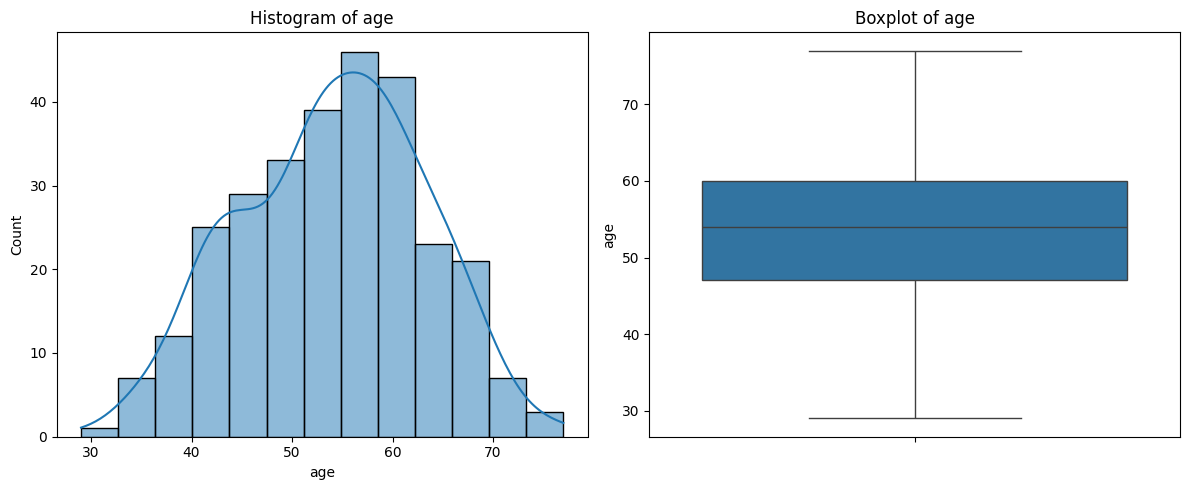

In [15]:
plot_numerical_column(df, "age")

# PART 3

# 3. Correlation analysis

## Correlation in continuous variables and  binary columns

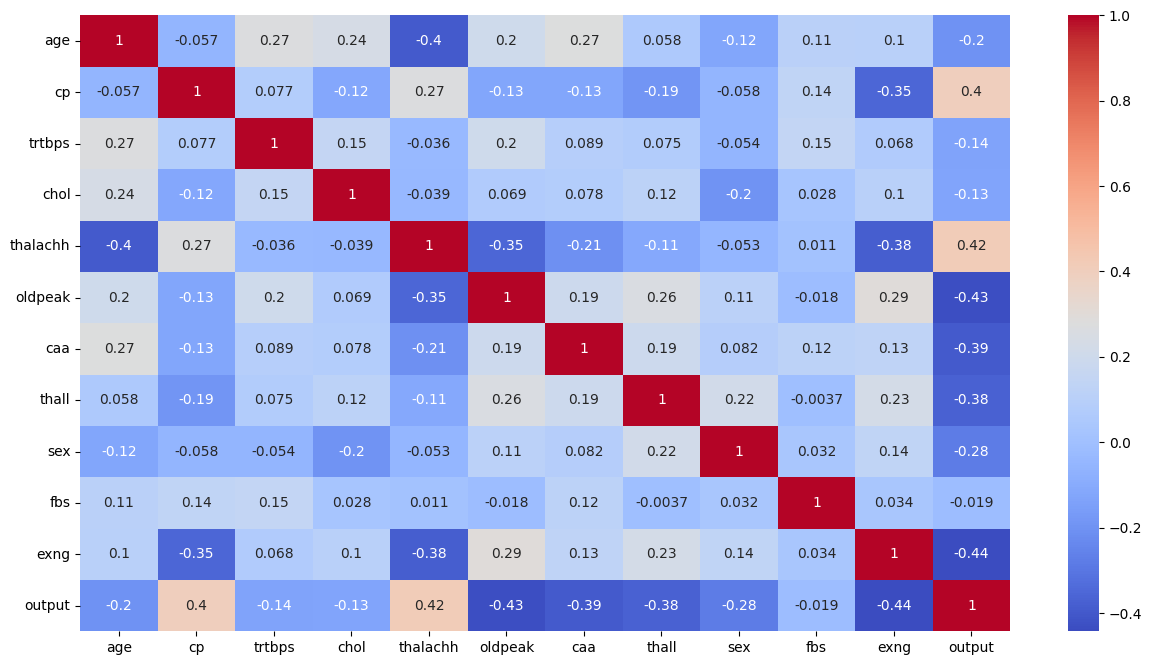

In [17]:
### 11. Find the correlation among continuous variables and binary columns (Ermitteln Sie die Korrelation zwischen continuous Variablen und binary Spalten.)

plt.figure(figsize=(15, 8))  
correlation_matrix = df[numerical_columns+binary_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [18]:
### 12 Find the correlation among non-binary column variables  ( Ermitteln Sie die Korrelation zwischen Variablen in nicht-binären Spalten.)


In [19]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    """Calculate Cramér's V statistic for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((rcorr-1), (kcorr-1)))

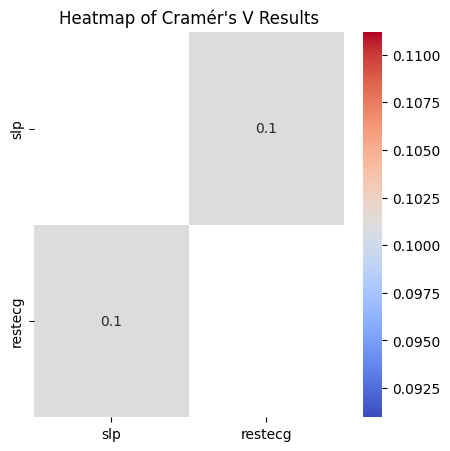

In [20]:
cramers_v_results = pd.DataFrame(index=non_binary_columns, columns=non_binary_columns)

for col1 in non_binary_columns:
    for col2 in non_binary_columns:
        if col1 != col2:
            cramers_v_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_results
plt.figure(figsize=(5, 5))
sns.heatmap(cramers_v_results.astype(float), annot=True, cmap='coolwarm')
plt.title("Heatmap of Cramér's V Results")
plt.show()

# PART 4

# 4. Correlation analysis  with Visualizing

In [22]:
###  Analyze and visually represent the correlation between numerical variables and categorical variables
### Analysieren und visualisieren Sie die Korrelation zwischen numerischen Variablen und kategorialen Variablen


In [23]:
from ipywidgets import interact, Dropdown, FloatSlider, HBox
import plotly.graph_objs as go
import pandas as pd
import plotly.subplots as sp

In [24]:
numerical_columns_sorted = sorted(numerical_columns)
categorical_columns_sorted = sorted(categorical_columns)
numerical_dropdown = Dropdown(options=numerical_columns_sorted, description='Numerical Column:')
categorical_dropdown = Dropdown(options=categorical_columns_sorted, description='Categorical Column:')

In [25]:
def update_plot(numerical_column, categorical_column):
    data = []
    categories = df[categorical_column].unique().tolist()
    if pd.isna(categories).any():
        categories.append(np.nan)
    for category in categories:
        if pd.isna(category):
            category_name = 'missing'  
            subset = df[pd.isna(df[categorical_column])][numerical_column]
        else:
            category_name = str(category)
            subset = df[df[categorical_column] == category][numerical_column]

        data.append(
            go.Box(
                y=subset,
                name=category_name
            )
        )
    fig = go.Figure(data=data)
    fig.update_layout(title=f'Distribution of {numerical_column} by {categorical_column} (including Missing)')
    fig.show()
interact(update_plot, numerical_column=numerical_dropdown, categorical_column=categorical_dropdown)

interactive(children=(Dropdown(description='Numerical Column:', options=('age', 'caa', 'chol', 'cp', 'oldpeak'…

<function __main__.update_plot(numerical_column, categorical_column)>